# <font size="6">Quantum Non Linear Light Emission in Metamaterials</font>

Reference : https://doi.org/10.1364/OPTICA.5.000608

<font size="4">**Team Members**</font> 

G.Avinash &emsp;&emsp;&ensp;&ensp;| 180260014 **Contribution** : Isofrequency Plots code, Specific parts of Theory<br> 
Vella Harika &emsp;&ensp;&ensp;  | 180260041 **Contribution** : Isofrequency Plots theory, Certain Plots<br>
Dev Pratap Jha&nbsp;&ensp;  | 180110028 **Contribution** : Calculations in Certain sections of Theory, LiNb03 permittivity plots<br>
Manikantt M&emsp;&emsp;&nbsp;     | 180010035 **Contribution** : Calculations of Spectral Power Density and coding it, AgGaP plots

# Hyperbolic Metamaterials
These are materials in whom the structure is a periodic arrangement of metal and dielectric. The key thing to note in such materials is the fact that the overall structure of material is important as compared to the individual structural elements while trying to study the electromagnetic properties of the material, which in our case is more like Optical Response. So, this generically then means that the theoretical framework of such a material would be via **Effective Medium Theory**

The reason is as follows. Effective Medium Theory here is where you consider the natural length scale parameter of the theory to be effectively much larger than the period of the material, which leads to looking at the structure as a composite whole rather than individial elements, while studying the optical response of such a material. In other words, the wavelength $\lambda$ >> P where P is the period of the structure of the material and $\lambda\$ is the wavelength of the light corresponding to optical modes of the material.

The above is structured metal and dielectric with periodic reptition, with one taking up a layered structure while the other a wire-like structure

**Layered Structure Optical Response**

$\epsilon_o = \epsilon_\perp = \rho\epsilon_m + (1 - \rho)\epsilon_d$<br>
$\epsilon_e = \epsilon_\parallel = \frac{\epsilon_m\epsilon_d}{\rho\epsilon_d \,+\, (1 - \rho)\epsilon_m}$

**Wire-like Structure Optical Response**

$\epsilon_o = \epsilon_\perp = \frac{(1 + \rho)\epsilon_m\epsilon_d \,+\,(1-\rho)\epsilon^{2}_d}{(1 + \rho)\epsilon_d \,+\, (1 - \rho)\epsilon_m}$<br>
$\epsilon_e = \epsilon_\parallel = \rho\epsilon_m + (1 - \rho)\epsilon_d$

$\rho$ is metal filling fraction; $\rho = \frac{h_d}{h_d\,+\,h_m}$ where $h_d$ and $h_m$ are dielectric and metal layer thicknesses respectively<br>
$\epsilon_o$ is Ordinary component
; $\epsilon_e$ is Extraordinary component 

In a uniaxial crystal, the dispersion relations are as follows

**Ordinary Waves**&emsp;&ensp;&ensp;&nbsp; : &nbsp; $\frac{k^2_x \, + \, k^2_y \, + \, k^2_z}{\epsilon_\perp} = \frac{\omega^2}{c^2}$<br>
**Extraordinary Waves** : &nbsp; $\frac{k^2_x \, + \, k^2_y}{\epsilon_\parallel} + \frac{k^2_z}{\epsilon_\perp} = \frac{\omega^2}{c^2}$<br>


Here is where we make a crucial observation about the isofrequency sufaces (constant $\omega$) coreesponding to the Oridnary and Extraordinary waves<br>
For Ordinary Waves, we can see that the isofrequency surfaces are spherical whereas for Extraordinary waves they are Conical. Let us look at the plots first and then make some inferences about the extraordinary waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import cmath
from scipy import integrate, ndimage
import math
from threading import Thread
import queue
from multiprocessing import Process, Pool
from scipy.interpolate import CubicSpline
from cmath import sqrt
import scipy
import sys
import time

In [2]:
def plot_conics(fig, num_points, c1, c2, c3, k, plot_ind, title_string):
    theta = np.linspace(0, np.pi, num_points)
    phi = np.linspace(0, 2*np.pi, num_points)
    
    coeffs = np.array([c1*k,c2*k,c3*k]) 
    rx, ry, rz = np.sqrt(abs(coeffs))
    max_radius = max(1/rx, 1/ry, 1/rz)
    u=np.linspace(-2,2,200)
    v=np.linspace(0,2*np.pi,60)
    [u,v]=np.meshgrid(u,v)
    p = np.sqrt(np.abs(c3))*np.outer(np.cos(phi), np.sin(theta))
    q = np.sqrt(np.abs(c3))*np.outer(np.sin(phi), np.sin(theta))
    r = np.sqrt(np.abs(c3))*np.outer(np.ones_like(phi), np.cos(theta))
    if c1 > 0 and c3 < 0:
        x = rx*np.cosh(u)*np.cos(v)
        y = ry*np.cosh(u)*np.sin(v)
        z = rz*np.sinh(u)
    elif c1 < 0 and c3 > 0:
        x = rx*np.sinh(u)*np.cos(v)
        y = ry*np.sinh(u)*np.sin(v)
        z = rz*np.cosh(u)
    elif c1 > 0 and c3 > 0:    
        x = rx*np.outer(np.cos(phi), np.sin(theta))
        y = ry*np.outer(np.sin(phi), np.sin(theta))
        z = rz*np.outer(np.ones_like(phi), np.cos(theta))
    else:
        x = rx*np.outer(np.cos(phi), np.sin(theta))
        y = ry*np.outer(np.sin(phi), np.sin(theta))
        z = np.zeros_like(x)
    
    ax = fig.add_subplot(plot_ind[0], plot_ind[1], plot_ind[2], projection = "3d")
    ax.view_init(elev = 10., azim = 10)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.dist = 12
    if c1 < 0 and c3 > 0:
        ax.plot_surface(x, y, -z, cmap = "viridis", edgecolor = "none")
        ax.plot_surface(x, y, z, cmap = "viridis", edgecolor = "none")
        ax.plot_surface(p, q, r, cmap = "viridis", edgecolor = "none")
        ax.set_xlabel("$k_x$", labelpad = -6)
        ax.set_ylabel("$k_y$", labelpad = -6)
        ax.set_zlabel("$k_z$", labelpad = -6)
        ax.set_title("$\omega$ = " + str(np.sqrt(k)) + " ; " + title_string)

    else:
        ax.plot_surface(x, y, z, cmap = "viridis", edgecolor = "none")
        ax.set_xlabel("$k_x$", labelpad = -6)
        ax.set_ylabel("$k_y$", labelpad = -6)
        ax.set_zlabel("$k_z$", labelpad = -6)
        ax.set_title("$\omega$ = " + str(np.sqrt(k)) + " ; " + title_string)
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius - 0.5, max_radius + 0.5))
    return

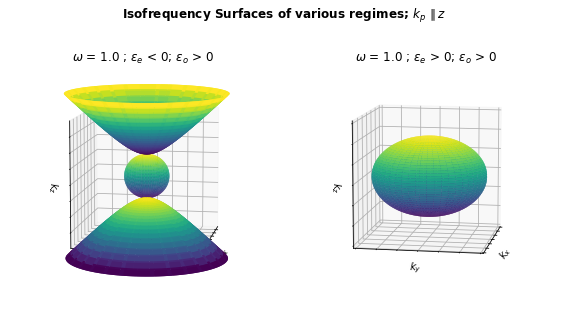

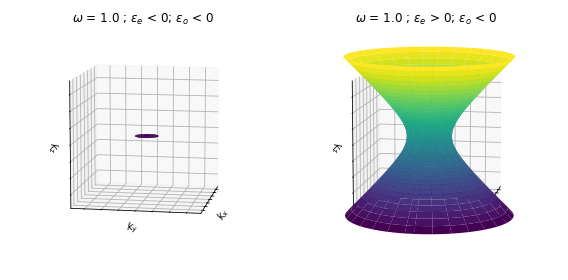

In [3]:
#Plots of dispersions for Extraordinary waves
fig = plt.figure(figsize = plt.figaspect(0.5))
plt.suptitle("Isofrequency Surfaces of various regimes; $k_p \, \parallel z$", y = 1.1, fontweight = "bold")
e1 = 2
e2 = 1
w = 1
plot_conics(fig, 100, e1, e1, e2, w, (1,2, 2), "$\epsilon_e$ > 0; $\epsilon_o$ > 0")
e1 = -0.5
e2 = 0.5
plot_conics(fig, 100, e1, e1, e2, 1, (1,2, 1), "$\epsilon_e$ < 0; $\epsilon_o$ > 0")
fig2 = plt.figure(figsize = plt.figaspect(0.5))
e1 = 0.5
e2 = -0.5
plot_conics(fig2, 100, e1, e1, e2, 1, (1, 2, 2), "$\epsilon_e$ > 0; $\epsilon_o$ < 0")
e1 = -0.5
e2 = -0.1
plot_conics(fig2, 100, e1, e1, e2, w, (1, 2, 1), "$\epsilon_e$ < 0; $\epsilon_o$ < 0")
plt.show()

Density of available optical states in the system ($O_d$) : $\int_{\partial {\nu_k}} {\lvert \frac{\partial\omega}{\partial k}\rvert}^{-1} \, d^2s$ &nbsp;;
$\partial{\nu_k}$ denoted the isofrequency surface

As we can see in the plots above

For **$\epsilon_\parallel$ > 0 and $\epsilon_\perp$ > 0** which is the case in regular crystals&nbsp;:
Isofrequency surfaces (constant $\omega$) are ellipsoidal. Due to the closed topology of this surface, for a given $\omega$ the density of optical modes ($O_d$) is finite. So, for a pump, phase matching is done over only a finite range of wave vectors which can be seen as he values of $k_x$, $k_y$ and $k_z$ enclosed by the ellipsoid surface as shown above

For **$\epsilon_\parallel$ > 0 and $\epsilon_\perp$ < 0** which is the case in layered hyperbolic media, has a one sheet hyperboloid as it's isofrequency surface which means it is unbounded in $O_d$

For **$\epsilon_\parallel$ < 0 and $\epsilon_\perp$ > 0** which is the also the case in wired hyperbolic media, has a two sheet hyperboloid as it's isofrequency surface which means it's semi-infinite in the density of optical modes i.e., $O_d$

For **$\epsilon_\parallel$ < 0 and $\epsilon_\perp$ < 0** real surfaces donot manifest in plots but this regime can still be accessed in certain meta materials where the periodic metal dielectric structure have modes with alternating sub wavelength. This we will be explored further on in the notebook

So what is so special about Hyperbolic isofrequency surfaces and the materials which exhibit that. Well, there will be a new mode of operation unlike regular crystals. We will see why below<br>

For crystals performing spontaneous parametric down conversion which in simpler terms is where two low energy photons (signal and idler) are produced from a single high energy photon(pump), conservation of momentum and energy is an iron clad rule. This in other terms also called phase matching means, the wave vectors $k_p , \, k_s, \, k_i$ corresponding to the pump, signal and idler photons have to be such that the relation $\delta k = k_p - k_s - k_i \rightarrow 0$ is respected. In the case of such hyperbolic media, the density of modes is infinite or atleast semi infinite (although practically media losses, limits on layer period account for reduced number of states) which means for a given pump with wave vector $k_p$, there will always be two signal and idler photons whose wave vectors satisfy the $\delta k = 0$ relation. This mode of operation where in theoretically the infinite optical modes leading to phase mismatch free operation is called **broadband operation**

**Mathematically**, if we do a small calculation with $\omega_i = \frac{\omega_p}{2}$ and $k_p \, \parallel \, \textbf{z}$. Using the phase matching conditions, we get $2k_{sz} = k_{pz}$, $k_{sz} = k_{iz}$ and $k_{s\perp} = -k_{i\perp}$ where $k_z$ is the component of pump wave vector along the propagation axis(**z**) and $k_\perp$ is the component of pump wave vector perpendicular to the propagation axis. Substituting these into the dispersion relations, we thereby get:<br>

$k^2_{s\perp} = \frac{\omega^2_s}{c^2}(\epsilon_{s\parallel} - n^2_p\frac{\epsilon_{s\parallel}}{\epsilon_{s\perp}})$; &nbsp; $n_p$ is the refractive index of medium at pump frequency $\omega_p$; &nbsp; $\epsilon_{s\parallel}, \, \epsilon_{s\perp}$ are components of permittivity tensor at $\omega_s$

In order to attain exact phase matching in lossless media, the wave vectors of the signal and idler have to be real, which means $k^2_{s\perp}$ is positive. For this to be true $\epsilon_{s\parallel} - n^2_p\frac{\epsilon_{s\parallel}}{\epsilon_{s\perp}}$ has to be > 0. So, for regular crystals where $\epsilon_{s\parallel}, \, \epsilon_{s\perp} > 0$, $n^2_p < \epsilon_{s\perp}$ which means the density of optical modes is finite. For layered hyperbolic media where $\epsilon_{s\parallel} > 0 \, , \, \epsilon_{s\perp} < 0$, $n_p^2$ > 0 which means for any pump propagating in the medium, there will be a pair of signal and idler photons which we saw earlier as a one sheet hyperbolidal isofrequency surface. For a wire hyperbolic medium, $\epsilon_{s\perp} < 0 \, , \, \epsilon_{s\parallel} > 0$, $n_p^2 > \epsilon_{s\perp}$ for extraordinary waves while phase matching is still obeyed for ordinary waves even at $n_p^2 < \epsilon_{s\perp}$, which we precisely saw as a two sheet hyperbolid above with a sphere (ordinary waves isofrequency surface) of radius $\epsilon_{s\perp}$ near the center. For the special regime where $\epsilon_{s_\perp}, \, \epsilon_{s_\parallel} < 0$, there is no real solution.

A very similar calculation can be done for the case where the pump propagates $\perp$ to the crystal axis(**z**); $k_p  \parallel  \textbf{x}$. Phase matching yields the condition $2k_{sx} = k_{px}$ and substituting it in the dispersion relation of the extraordinary waves, we get &nbsp; $k^2_{sy} + k^2_{sz}\frac{\epsilon_{s\parallel}}{\epsilon_{s\perp}} = \frac{\omega^2_s}{c^2}(\epsilon_{s\parallel} - n^2_p)$. The interesting regime to note here is the $\epsilon_{s\perp}, \, \epsilon_{s\parallel} < 0$. This regime had no real solution when the pump was propagating parallel to the crystal axis, but here when the pump is propagating perpendicular to the crystal axis, the phase matching condition is always satisfied. So, interestingly here, the light propagation is hyperbolic. We will see the case of $\epsilon_{s\parallel} > 0, \, \epsilon_{s\perp} < 0$ qualitatively via a plot below

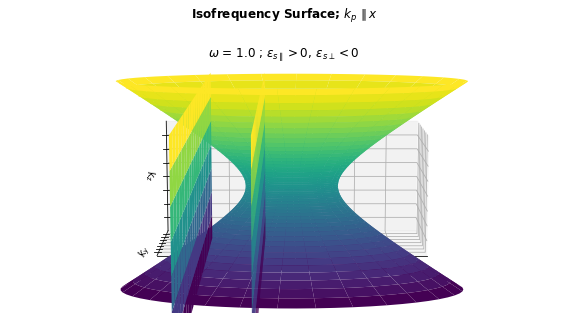

In [4]:
fig = plt.figure(figsize = plt.figaspect(0.5))
plt.suptitle("Isofrequency Surface; $k_p \, \parallel x$", y = 1.1, fontweight = "bold")
e3 = 0.5
e4 = -1
k = 1
coeffs = np.array([e3*k,e3*k,e4*k]) 
rx, ry, rz = np.sqrt(abs(coeffs))
max_radius = max(1/rx, 1/ry, 1/rz)
u=np.linspace(-2,2,200)
v=np.linspace(0,2*np.pi,60)
[u,v]=np.meshgrid(u,v)
x = rx*np.cosh(u)*np.cos(v)
y = ry*np.cosh(u)*np.sin(v)
z = rz*np.sinh(u)
xx, yy = np.meshgrid(range(-10,10), range(-4,4))
r = 2*np.ones_like(xx) + 3*xx
s = 3*xx
ax = fig.add_subplot(1, 1, 1, projection = "3d")
ax.view_init(elev = 10., azim = 90)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.dist = 12
ax.plot_surface(x, y, z, cmap = "viridis", edgecolor = "none")
ax.plot_surface(0.5*np.ones_like(xx), xx, yy, cmap = "viridis", edgecolor = "none")
ax.plot_surface(1.5*np.ones_like(xx), xx, yy, cmap = "viridis", edgecolor = "none")
ax.set_xlabel("$k_x$", labelpad = -6)
ax.set_ylabel("$k_y$", labelpad = -6)
ax.set_zlabel("$k_z$", labelpad = -6)
ax.set_title("$\omega$ = " + str(np.sqrt(k)) + " ; " + "$\epsilon_{s\parallel} > 0, \, \epsilon_{s\perp} < 0$ ", y = 1.1)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius - 0.5, max_radius + 0.5))

We can see from the isofrequency surface for the regime $\epsilon_{s\parallel} > 0, \, \epsilon_{s\perp} < 0$, that when the pump is propagating along x-axis i.e., perpendicular to the crystal axis, (right to left in the above figure), it changes from a 1-sheet hyperobolic x-contour (right plane) to a 2-sheet hyperbolic x-contour (left plane).

**<font size = 4>Emission Rate and Power of Spontaneous Parameter Down Conversion</font>**

Let us take the effective permittivity tensor $\bar{\bar{\epsilon}}$ = diag($\epsilon_\perp, \, \epsilon_\perp, \, \epsilon_\parallel$). The key thing to note in the non linear material we have chosen is that the anisotropy makes it extremely difficult to study the microscopic properties in detail. Hence a macroscopic theoretical framework or description would be used in order to formulate and calculate the required values of the material. A microscopic theory would have had us to analyze the degrees of freedom and also the Electric Fields inside the crystal which in the case of unpredictable anisotropy is extremely difficult to analyze. So, here we would be considering a classical description of the pump and thereby study the emission of the signal and idler quantum mechanically. There are 3 interacting waves we are talking about here, pump, signal and idler. Let us say the Electric field inside the crystal is the vector sum of the Electric fields corresponding to these 3 waves i.e., **$E$ = $E_p$ + $E_s$ + $E_i$** .Let us write the Hamiltonian of this system as two parts, $\hat{H}_{lin}$ the linear part of the Hamiltonian which corresponds to the self energy of the 3 interacting fields and $\hat{H}_{int}$ the energy content corresponding to the non linear interaction between the 3 interacting fields.

By considering dispersion theory upto first order, the self energy Hamiltonian evaluates to be as follows<br>
$\hat{H}_{lin}^{s,i} = \frac{1}{2}\int_V d^3r \,\,{[\frac{1}{\mu_o}\hat{B}^2 + \epsilon_o\hat{E}\bar{\bar{\epsilon}}\hat{E} + \epsilon_o\omega\hat{E}\frac{\partial\bar{\bar{\epsilon}}}{\partial\omega}\hat{E}]}_{s,i}$; V = Quantization Volume of Crystal = AxL where A is the crystal area perpendicular to the pump propagation and L is the distance along the propagation direction.

$\hat{H}_{int} = \epsilon_o\int_V d^3r \,\, \sum_{lmn} \bar{\bar{\chi}}_{lmn}^{(2)} \,E_l(\omega_p)\,E_m^+(\omega_s)\,E_n^+(\omega_i)$ + H.c - (1.1)<br>
$\bar{\bar{\chi}}^{(2)}$ is the second order non linear susceptibility tensor of the crystal and posseses the Klienman's symmetry and is non dispersive. Klienman's symmetry is where the last two indices are permutible leading to the computation of 9 components in cases of 3 dimensions coming down to 6

Now quantizing the Electric fields by expanding it in terms of it's Fourier modes consisting of individual plane waves.

$\hat{E}_\psi = \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_\psi}{\epsilon_o}}\,\sum_{\nu}\sum_{\textbf{k}_{\psi\nu}} \, c_{\textbf{k}_{\psi\nu}}\,\textbf{u}_{\textbf{k}_{\psi\nu}} \, \hat{a}_{\textbf{k}_{\psi\nu}} \, e^{i\textbf{k}_{\psi\nu}r - i\omega t}$ - (1.2)<br>
$\hat{a}_{\textbf{k}_{\psi\nu}}$ and $\hat{a}_{\textbf{k}_{\psi\nu}}^+$ are photon aniihilation and creation operators respectively, index $\psi$ = {s, i} differentiates between signal and idler waves, index $\nu$ runs over ordinary and extraordinary waves that may exist in the uniaxial crystal. The electric field polarizations $\textbf{u}_{\textbf{k}_{\psi\nu}}$ of the crystal in a general case are given as eigenmode solutions of the Fresnel equation 

$\textbf{u} = \begin{pmatrix} u_x \\ u_y \\ u_z \end{pmatrix} = u_o\begin{pmatrix} \frac{k_x}{k^2 - \frac{\omega^2}{c^2}\epsilon_\perp} \\ \frac{k_y}{k^2 - \frac{\omega^2}{c^2}\epsilon_\perp} \\ \frac{k_z}{k^2 - \frac{\omega^2}{c^2}\epsilon_\parallel} \end{pmatrix}$<br>
Normalization is chosen such that the polarizations satisfy orthonormality condition $\textbf{u}_{\textbf{k}_{\psi\nu}}\textbf{u'}_{\textbf{k}_{\psi\nu}} = \delta_{\nu\nu^{'}}$<br>
Normalization coefficients $c_{\textbf{k}_{\psi\nu}}$ are chosen such that energy of each of the eigen modes $\textbf{k}_{\psi\nu}$ is quantized in the units of $\hbar\omega_\psi$ : 

$c_{\textbf{k}_{\psi\nu}} = {[\textbf{u}_{\textbf{k}_{\psi\nu}} \, \bar{\bar{\epsilon}}_{\psi} \, \textbf{u}_{\textbf{k}_{\psi\nu}} + \frac{1}{2}\textbf{u}_{\textbf{k}_{\psi\nu}} \, \omega_\psi \, \frac{\partial \bar{\bar{\epsilon}}_\psi}{\partial\omega} \, \textbf{u}_{\textbf{k}_{\psi\nu}}]}^{\frac{-1}{2}}$

We said we will treat $E_p$ classically; $E_p = \frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}} \, \textbf{u}_p \, e^{i\textbf{k}_p r - i\omega t} \,\, + c.c.$

Assuming the losses are weak and do not perturb the nonlinear interaction and spontaneous photon downconversion. Specifially, it is considered that the probabilities of photon emission and subsequent photon absorption are independent of each other. In this case the rate of generation of signal photons with a given frequency $\omega_s$ and wavevector $\textbf{k}_s(\omega_s)$ for all possible idler waves can be written as<br>

$\boxed{R_s(\omega_s, \textbf{k}_s) = \frac{2\pi}{\hbar}x\int_{\nu_i} \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \, \delta(\omega_p - \omega_s - \omega_i) \, d^3\textbf{k}_i}$<br>

$\lvert0>$ is the state where there are no idler and signal photons and $\lvert f>$ is the state where there is one idler photon and one signal photon with their wavevectors and frequencies such that the energy conservation and momentum conservation is preserved.

Now, the task is to find the matrix element $<f\lvert\hat{H}_{int}\rvert0>$

We will make use of equations (1.1) and (1.2) in order to compute the required quantity

$\hat{E}_\psi = \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_\psi}{\epsilon_o}}\,\sum_{\nu}\sum_{\textbf{k}_{\psi\nu}} \, c_{\textbf{k}_{\psi\nu}}\,\textbf{u}_{\textbf{k}_{\psi\nu}} \, \hat{a}_{\textbf{k}_{\psi\nu}} \, e^{i\textbf{k}_{\psi\nu}r - i\omega t}$<br>

$\hat{H}_{int} = \epsilon_o\int_V d^3r \,\, \sum_{lmn} \bar{\bar{\chi}}_{lmn}^{(2)} \,E_l(\omega_p)\,E_m^+(\omega_s)\,E_n^+(\omega_i)$

**Note** : There are particular frequencies and wave vectors associated with the signal and idler photons emitted (not a range). And also in the final state only a single idler photon and a single signal photon is considered.

$E_l(\omega_p) = E_{li} + E_{ls} + E_{lp} = \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_p}{\epsilon_o}} \, c_{\textbf{k}_i} \,\textbf{u}_l \, \hat{a}_{\textbf{k}_i} \, e^{i\textbf{k}_i r - i\omega_p t} + \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_p}{\epsilon_o}} \, c_{\textbf{k}_s} \,\textbf{u}_l \, \hat{a}_{\textbf{k}_s} \, e^{i\textbf{k}_s r - i\omega_p t} + \frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}} \, \textbf{u}_l \, e^{i\textbf{k}_p r - i\omega_p t}$ -- (2.1) <br>

$E_m^+(\omega_s) = E_{mi}^+ + E_{ms}^+ + E_{mp}^+ = \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_s}{\epsilon_o}} \, c_{\textbf{k}_i} \,\textbf{u}_m \, \hat{a}_{\textbf{k}_i}^+ \, e^{-i\textbf{k}_i r + i\omega_s t} + \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_s}{\epsilon_o}} \, c_{\textbf{k}_s} \,\textbf{u}_m \, \hat{a}_{\textbf{k}_s}^+ \, e^{-i\textbf{k}_s r + i\omega_s t} + \frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}} \, \textbf{u}_m \, e^{-i\textbf{k}_p r + i\omega_s t}$ -- (2.2)

$E_n^+(\omega_i) = E_{ni}^+ + E_{ns}^+ + E_{np}^+ = \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_i}{\epsilon_o}} \, c_{\textbf{k}_i} \,\textbf{u}_n \, \hat{a}_{\textbf{k}_i}^+ \, e^{-i\textbf{k}_i r + i\omega_i t} + \frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_i}{\epsilon_o}} \, c_{\textbf{k}_s} \,\textbf{u}_n \, \hat{a}_{\textbf{k}_s}^+ \, e^{-i\textbf{k}_s r + i\omega_i t} + \frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}} \, \textbf{u}_n \, e^{-i\textbf{k}_p r + i\omega_i t}$ -- (2.3)

$\nu$ index is suppressed for convenience and ease of calculation

Just like how in a harmonic oscillator $\hat{a}^+\lvert0>, \, \hat{a}^+\hat{a}^+\lvert0>, \, \hat{a}^+\hat{a}^+\hat{a}^+\lvert0>$.... form the basis for the hilbert space of the harmonic oscillator, here also combinations of the creation and annihilation operators of photons (idler and signal) form a basis for the Hilbert space of this system. This in other words means < k | l > = $\delta_{kl}$

So, while calculating $<f\lvert\hat{H}_{int}\rvert0>$, here we already said that $\rvert f>$ is a state comprising of one idler photon and one signal photon more than the $\rvert0>$ state. This means the value $\sum_{lmn} \bar{\bar{\chi}}_{lmn}^{(2)} \,E_l(\omega_p)\,E_m^+(\omega_s)\,E_n^+(\omega_i)$ which is enclosed within the two kets has to either have two $\hat{a}^+$s (one signal and one idler) to the right or two $\hat{a}$s (one signal and one idler) to the left for the term to be nonzero. As we can see from the equations 2.1, 2.2 and 2.3, such non zero terms will arise only from Term3_(2.1).Term1_(2.2).Term2_(2.3) and Term3_(2.1).Term2_(2.2).Term1_(2.3). Now by using Klienman's symmetry, we can then write down

$<f\lvert\hat{H}_{int}\rvert0> = \epsilon_o\int_V d^3r \,\, \sum_{lmn} \bar{\bar{\chi}}_{lmn}^{(2)} \,(\frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}} \, \textbf{u}_l \, e^{i\textbf{k}_p r - i\omega_p t})(\frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_s}{\epsilon_o}} \, c_{\textbf{k}_i} \,\textbf{u}_m \, \hat{a}_{\textbf{k}_i}^+ \, e^{-i\textbf{k}_i r + i\omega_s t})(\frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_i}{\epsilon_o}} \, c_{\textbf{k}_s} \,\textbf{u}_n \, \hat{a}_{\textbf{k}_s}^+ \, e^{-i\textbf{k}_s r + i\omega_i t})$

$<f\lvert\hat{H}_{int}\rvert0> = \epsilon_o(\frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_o cn_pA}})(\frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_s}{\epsilon_o}})(\frac{1}{\sqrt{V}}\sqrt{\frac{\hbar\omega_i}{\epsilon_o}}) \, c_{\textbf{k}_i}c_{\textbf{k}_s} \,\sum_{lmn} \bar{\bar{\chi}}_{lmn}^{(2)} \,\textbf{u}_l\textbf{u}_m\textbf{u}_n \,\int_V d^3r \,\, e^{i\textbf{k}_p r - i\omega_p t} \, e^{-i\textbf{k}_i r + i\omega_s t} \, e^{-i\textbf{k}_s r + i\omega_i t}$ <br>
By conservation of energy : $\omega_p = \omega_s + \omega_i$

$\boxed{<f\lvert\hat{H}_{int}\rvert0> = \hbar\sqrt{\omega_s\omega_i}\frac{1}{V}c_{\textbf{k}_s}c_{\textbf{k}_i}\frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_ocn_pA}}. \sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i) \, \int_Vd^3\textbf{r} \, e^{i\delta kr}}$

$\delta \textbf{k} = (\textbf{k}_p - \textbf{k}_{s\parallel} - \textbf{k}_{i\parallel}) - (\textbf{k}_{s\perp} + \textbf{k}_{i\perp})$, $\textbf{k}_p$ is the pump wave vector, $\textbf{k}_{\psi\parallel}, \, \textbf{k}_{\psi\perp}$ are components of signal(idler) wave vectors parallel and perpendicular to the pump direction of propagation 
respectively. 

Now, let us go back to the expression of photon generation rate $R_s(\omega_s, \textbf{k}_s) = \frac{2\pi}{\hbar}x\int_{\nu_i} \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \, \delta(\omega_p - \omega_s - \omega_i) \, d^3\textbf{k}_i$

The thing to note here is that, we are focusing on the rate of generation of signal photons which is evidently same which the rate of generation of the idler photon as can be seen from the topology of the Feynman Diagram corresponding to this process. So, in the integration, it is performed over the entire phase space of the idler photons with ofcourse the available optical modes being bounded by the isofrequency surface. So, the final intuition is like this, ${\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2$ corresponds to the probability that the system goes from a state with no idler and signal photons i.e., $\lvert0>$ to a state containing one signal and one idler photon i.e., $\lvert f>$ with the phase matching and energy conservation conditions intact. But we donot have any constraints over either $\textbf{k}_s$ or $\textbf{k}_i$ other than the phase matching condition, which means they are pretty flexible amongst each other in the values they take up as long as the phase matching condition is maintained. So, we calaculate R for a given $\textbf{k}_s$ integrated over all the $\textbf{k}_i$ that are within the available optical modes which is ofcourse determined by the isofrequency surface of the idler photons.

$\textbf{k}_i$ is made of two components, $\textbf{k}_\perp$ and $\textbf{k}_\parallel$ $\rightarrow$ $d^3\textbf{k}_i = dk_\parallel \, d^2k_{\perp}$ with the note that $\textbf{k}_\perp$ lies in the 2D vector space $\rightarrow$ $d\omega \, \frac{\partial\textbf{k}_\parallel}{\partial\omega} \, d^2\textbf{k}_\perp$

$R_s(\omega_s, \textbf{k}_s) = \frac{2\pi}{\hbar}x\int_{\nu_i} \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \, \delta(\omega_p - \omega_s - \omega_i) \, d\omega \, \frac{\partial\textbf{k}_\parallel}{\partial\omega} \, d^2\textbf{k}_\perp$;&emsp; $\int_{\nu_i} \, \delta(\omega_p - \omega_s - \omega_i) \, d\omega = 1$

$R_s(\omega_s, \textbf{k}_s) = \frac{2\pi}{\hbar}x\int_{\nu_i} \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \,\frac{\partial\textbf{k}_\parallel}{\partial\omega} \, d^2\textbf{k}_\perp$ ; &nbsp; So here the integration can be interpreted as being done over wave vectors in a plane perpendicular to the propagation direction of the pump bounded by the contours of the isofrequency surface of the idler photons in the plane. Also, it is evident that $\frac{\partial\textbf{k}_\parallel}{\partial\omega}$ is the group velocity component of the idler parallel to the pump propagation direction.

So far we have considered the loss component of the permittivity tensor to be very small compared to it's real lossless component which is true in the case of the quantized description of the Electric fields of the signal and the idler, but we have already said, the pump is being treated classically. So there is no such restriction of minimally small lossy component which means we would have to account for the loss in the power of the signal and idler photons which in other words probability of the loss of signal photon due to reabsorption in some time frame immediately after emission. In a lossless sitaution, the probability of observing a signal photon at time t is $P^{'}_s = R_st$. The probability of observing a signal photon between $\tau$ and $\tau+d\tau$ is $\delta P'_s(\tau) = \frac{dP^{'}_s(\tau)}{d\tau} \,d\tau$. But in a lossy case, this will decrease due to probability of reabsorption of the signal photon in the medium. Let us say, it is an exponentially decaying attenuation factor $e^{-\gamma(\textbf{k}_s)(t - \tau)}$ where $\gamma(\textbf{k}_s)$ is the signal photon dissipation rate. So, the new probability (between $\tau$ and $\tau + d\tau$) becomes $\delta P_s(t, \tau) = \delta P'_s(\tau) \, e^{-\gamma(\textbf{k}_s)(t - \tau)}$

$\delta P_s(t, \tau) = \frac{dP^{'}_s(\tau)}{d\tau} \, d\tau \, e^{-\gamma(\textbf{k}_s)(t - \tau)}$. Now the new probability of observing signal photon at time t becomes.

$P_s(t) = \int^t_0 \, \delta P_s(t, \tau) \, d\tau$;&ensp;$R_s = \frac{dP_s}{dt}$ $\rightarrow$ $R_s = R_s \, e^{-\gamma(\textbf{k}_s)t}$<br>
t is the time scale of the propagator between two vertices in the Feynman diagram showing emission and reabsorption of the signal photon

From this, let us now find the signal photon spectral power density across possible intervals of $\omega_s$. Let us denote the power of signal photon by $M_s$.Thereby integrating over all emission angles

$\frac{dM_s}{d\omega_s} = \frac{V}{8\pi^3} \, \int_{\nu_s} \, \hbar\omega_s \, R_s(\omega_s, \textbf{k}_s) \, e^{-\gamma^{'}(\textbf{k}_s)L} \, \delta(\omega - \omega_s) \, d^3\textbf{k}_s$; We are doing nothing but multiply the energy of each signal photon with their rate of propagation.

We used the phase space with available optical modes of idler to determine the rate of signal photon emission. Now, we will integrate over the entire phase space of the signal photons over the available optical modes determined by the isofrequency surfaces of the signal photons to find the power spectral density of them.

$\gamma^{'}_s(\textbf{k}_s) = \frac{\gamma(\textbf{k}_s)}{v_{g\parallel}(\textbf{k}_s)}$; &nbsp; $t = \frac{L}{v_{g\parallel}(\textbf{k}_s)}$; &nbsp; $d^3\textbf{k}_s = d^2\textbf{k}_{s\perp} \, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \, d\omega_s$; &nbsp; $v_{g\parallel}(\textbf{k}_s)$ is the signal group velocity component in the direction of pump propagation.

$\frac{dM_s}{d\omega_s} = \frac{V}{8\pi^3} \,\, \int_{\nu_s} \,\, \hbar\omega_s \,\, R_s(\omega_s, \textbf{k}_s) \,\, e^{-\gamma^{'}(\textbf{k}_s)L} \,\, \delta(\omega - \omega_s) \,\, d\omega \,\, d^2\textbf{k}_{s\perp} \,\, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega}$; &nbsp; $\int_{\nu_s} \,\delta(\omega - \omega_s) \, d\omega = 1$

$\frac{dM_s}{d\omega_s} = \frac{V}{8\pi^3} \,\, \int_{\nu_s} \,\,\frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \hbar\omega_s \,\, R_s(\omega_s, \textbf{k}_s) \,\, e^{-\gamma^{'}(\textbf{k}_s)L} \,\,d^2\textbf{k}_{s\perp}$ $\rightarrow$(3.1), Let us substitute $R_s(\omega_s, \textbf{k}_s)$ into the expression

$R_s(\omega_s, \textbf{k}_s) = \frac{2\pi}{\hbar}x\int_{\nu_i} \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \,\frac{\partial\textbf{k}_\parallel}{\partial\omega} \, d^2\textbf{k}_\perp$ $\rightarrow$(3.2)

Let us the take the area (A) of the crystal to be $\rightarrow\infty$, in this limit <br>

$<f\lvert\hat{H}_{int}\rvert0> = \hbar\sqrt{\omega_s\omega_i}\frac{1}{V}c_{\textbf{k}_s}c_{\textbf{k}_i}\frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_ocn_pA}}. \sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i) \, \int_Vd^3\textbf{r} \, e^{i\delta kr}$ $\rightarrow$(3.3)

$\int_Vd^3\textbf{r} \, e^{i\delta kr} = \int_Vd^2r_\perp dr_\parallel \, e^{i(\textbf{k}_p - \textbf{k}_{s\parallel} - \textbf{k}_{i\parallel})r_\parallel - (\textbf{k}_{s\perp} + \textbf{k}_{i\perp})r_\perp} = \int_Ad^2r_\perp\ \,  e^{-(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})r_\perp} \, \int_0^L dr_\parallel \, e^{i(\textbf{k}_p - \textbf{k}_{s\parallel} - \textbf{k}_{i\parallel})r_\parallel}$

$\int_Ad^2r_\perp\ \,  e^{-(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})r_\perp}$, A $\rightarrow\infty$ is the inverse fourier transform of $e^{-(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})r_\perp}$ which is $-4\pi^2\delta(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})$

$\int_0^L dr_\parallel \, e^{i(\textbf{k}_p - \textbf{k}_{s\parallel} - \textbf{k}_{i\parallel})r_\parallel} = \frac{-1 + e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}$ ; $\delta k_\parallel = (\textbf{k}_p - \textbf{k}_{s\parallel} - \textbf{k}_{i\parallel})\frac{k_p}{\lvert k_p \rvert}$ 

So in A $\rightarrow\infty$ limit ; $<f\lvert\hat{H}_{int}\rvert0> = \hbar\sqrt{\omega_s\omega_i}\frac{4\pi^2}{V}c_{\textbf{k}_s}c_{\textbf{k}_i}\frac{1}{2}\sqrt{\frac{2P_p}{\epsilon_ocn_pA}}. \sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i) \, \frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel} \, \delta(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})$ $\rightarrow$(3.3)

So, substituting (3.2) and (3.3) in (3.1)

$\frac{dM_s}{d\omega_s} = \frac{V}{8\pi^3} \, \int_{\nu_s}\int_{\nu_i} \,\frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \hbar\omega_s \, \frac{2\pi}{\hbar}x \, \frac{V}{8\pi^3\hbar} \, {\lvert{<f\lvert\hat{H}_{int}\rvert0>}\rvert}^2 \,\frac{\partial\textbf{k}_\parallel}{\partial\omega} \, e^{-\gamma^{'}(\textbf{k}_s)L} \,\, d^2\textbf{k}_{i\perp} d^2\textbf{k}_{s\perp}$

$\frac{dM_s}{d\omega_s} = \frac{V}{8\pi^3} \, \int_{\nu_s}\int_{\nu_i} \,\frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \hbar\omega_s \, \frac{2\pi}{\hbar}x \, \frac{V}{8\pi^3\hbar} \, \hbar^2\omega_s\omega_i\frac{16\pi^4}{V^2}c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2\frac{1}{4}\frac{2P_p}{\epsilon_ocn_pA}. {\left| \,\sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i)\, \right|}^{\,2} \, {\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\,\right|}^{\,2} \, \delta(\textbf{k}_{s\perp} + \textbf{k}_{i\perp}) \,\frac{\partial\textbf{k}_\parallel}{\partial\omega} \, e^{-\gamma^{'}(\textbf{k}_s)L} \,\, d^2\textbf{k}_{i\perp} d^2\textbf{k}_{s\perp}$

$\int_{\nu_i} \,\delta(\textbf{k}_{s\perp} + \textbf{k}_{i\perp})\,\, d^2\textbf{k}_{i\perp} = 1$

$\boxed{\frac{dM_s}{d\omega_s}  = \frac{\hbar\omega_s^2\omega_iL^2}{2{(2\pi)}^3}\frac{P_p}{\epsilon_ocn_p} \, \int \, d^2\textbf{k}_{s\perp} \,\, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \, \frac{\partial\textbf{k}_{i\parallel}}{\partial\omega}c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2 \, \times\,{\left| \,\sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i) \,\right|}^{\,2} \, {\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\, \right|}^{\,2}  \, e^{-\gamma^{'}(\textbf{k}_s)L}}$

$d\omega_s\rightarrow d\lambda_s$

$\boxed{\frac{dM_s}{d\lambda_s}  = \frac{\hbar\pi c^3L^2}{\lambda_s^4\lambda_i}\frac{P_p}{\epsilon_on_p} \, \int \, d^2\textbf{k}_{s\perp} \,\, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \, \frac{\partial\textbf{k}_{i\parallel}}{\partial\omega}c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2 \, \times\,{\left| \,\sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i)\,\right|}^{\,2} \, {\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\,\right|}^{\,2}  \, e^{-\gamma^{'}(\textbf{k}_s)L}}$

# HYPERBOLIC Ag-LiNbO3 AND Ag-GaP STRUCTURES

**w_p** $\rightarrow$ Plasma frequency<br>
**eps_d** $\rightarrow$ Permittivity of the dielectric in Drude model<br>
**pac_frac** $\rightarrow$ Packing fraction of the metal dielectric material<br>
**g_r** $\rightarrow$ Collision frequency<br>
**c** $\rightarrow$ Speed of Light<br>
**w_ez** $\rightarrow$ Frequency at which the ordinary component of layered material permittivity or the extraordinary component of the wired material permittivity is zero<br>
**lmda_ez** $\rightarrow$ Wavelength corresponding to w_ez<br> 
**x** $\rightarrow$ $\frac{\lambda}{\lambda_{ENZ}}$<br>
**eps_m** $\rightarrow$ Permittivity of the metal in the Drude model<br>
**eps_perp** $\rightarrow$ Ordinary component of permittivty at Signal photon freq. in wired medium<br>
**eps_parallel** $\rightarrow$ Extraordinary component of permittivity at Signal photon freq. in wired medium<br>
**eps_l_parallel** $\rightarrow$ Extraordinary component of permittivity at Signal photon freq. in layered medium<br>
**eps_l_perp** $\rightarrow$ Ordinary component of permittivity at Signal photon freq. in layered medium<br>

For plotting these graphs and analyzing the results in this section, we will consider hyperbolic structures comprised of a non dispersive dielectric with a permittivity $\epsilon_d = 2$ and a Drude metal with $\epsilon_m = 1 - \frac{\omega^2_{plasm}}{\omega(\omega - ig)}$; where $\omega_{plasm}$ is the plasma frequency and g is the collision frequency. $\lambda_{ENZ}$ is the wavelength for which $\rho\epsilon_m + (1 - \rho)\epsilon_d = 0$ i.e., at which either ordinary component (for layer hyperbolic) or extraordinary component (for wire-hyperbolic) of the permitticity tensor go through the epsilon-near-zero point (ENZ)

$\boxed{\frac{dM_s}{d\lambda_s}  = \frac{\hbar\pi c^3L^2}{\lambda_s^4\lambda_i}\frac{P_p}{\epsilon_on_p} \, \int \, d^2\textbf{k}_{s\perp} \,\, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \, \frac{\partial\textbf{k}_{i\parallel}}{\partial\omega}c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2 \, \times\,{\left| \,\sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i)\,\right|}^{\,2} \, {\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\,\right|}^{\,2}  \, e^{-\gamma^{'}(\textbf{k}_s)L}}$

This expression is very complex to analyze by itself. In Non Linear Optics, it is frequently assumed that the non linear wave interaction and mixing may be described by some effective nonlinearity, which mathematically implies that $N(\textbf{k}_s, \textbf{k}_i) \rightarrow const$ where $N(\textbf{k}_s, \textbf{k}_i)$ is ${\left| \,\sum_{lmn}\bar{\bar{\chi}}^{(2)}_{lmn}u_l(\omega_p)u_m(\omega_s)u_n(\omega_i)\,\right|}^{\,2}$. In this limit the integral simplifies to:

$G(\omega_s, \omega_p) = \int \, d^2\textbf{k}_{s\perp} \,\, \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega} \, \frac{\partial\textbf{k}_{i\parallel}}{\partial\omega}c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2 \,{\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\,\right|}^{\,2}  \, e^{-\gamma^{'}(\textbf{k}_s)L}$

It depends on signal and idler wave dispersions (embedded into coefficients $c_{\textbf{k}_s}^2c_{\textbf{k}_i}^2$), the group velocities in the direction of pump propagation ($ \frac{\partial\textbf{k}_{s\parallel}}{\partial\omega}$ and  $\frac{\partial\textbf{k}_{i\parallel}}{\partial\omega}$), phase matching (${\left| \,\frac{1 - e^{i\delta k_{\parallel}L}}{i\delta k_\parallel}\,\right|}^{\,2}$), and the signal photon dissipation ($e^{-\gamma^{'}(\textbf{k}_s)L}$)

Via these plots we explore the dynamics of this integral in the hyperbolic regime. As said above, Drude metal parameters will be used

# LiNbO3 - Ag

$\rho$ = 0.25; 80nm period

In [5]:
w_p = 1.39*(10**16)
eps_d = 2
pac_frac = 0.25
w_p = (5/(6*1.39))*w_p
g_r = (10**-3)*w_p
g = g_r*1j
c = 3*10**8
k = pac_frac + (1 - pac_frac)*eps_d
w_ez = sqrt((w_p**2*pac_frac)/k - g_r**2).real
lmda_ez = 2*math.pi*c/w_ez
x = np.arange(0.1, 5, 0.01)
eps_m = 1 - (w_p**2/((w_ez/x)*((w_ez/x)-g)))
eps_perp = np.conj(((1 + pac_frac)*eps_m*eps_d + (1 - pac_frac)*eps_d**2)/((1 + pac_frac)*eps_d + (1 - pac_frac)*eps_m))
eps_parallel = np.conj(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_l_perp = np.conj(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_l_parallel = np.conj((eps_m*eps_d)/(pac_frac*eps_d + (1 - pac_frac)*eps_m))

In [6]:
print("Calculated value of lambda_ENZ is {}".format(lmda_ez*10**9) + " nm")

Calculated value of lambda_ENZ is 598.4569421117209 nm


That fact that $\lambda_{ENZ}$ is much greater than the period justifies the use of effective medium theory

(a) Dispersion of ordinary and extraordinary components of the effective permittivity tensor for a layer-hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

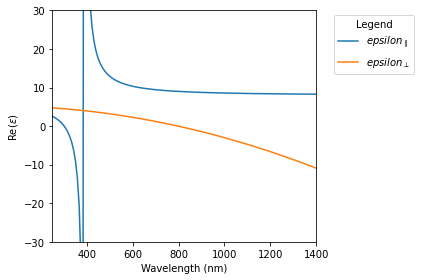

In [7]:
plt1, = plt.plot((4/3)*x*lmda_ez.real*10**9, 3*eps_l_parallel.real, label = "$epsilon_{\parallel}$")
plt2, = plt.plot((4/3)*x*lmda_ez.real*10**9, 3*eps_l_perp.real, label = "$epsilon_{\perp}$")
plt.legend(handles=[plt1, plt2], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(250, 1400)
plt.ylim(-30, 30)
plt.ylabel("Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(b) Dispersion of the material "quality factor" defined as the ratio of the imaginary to real part of the permittivity in layer hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

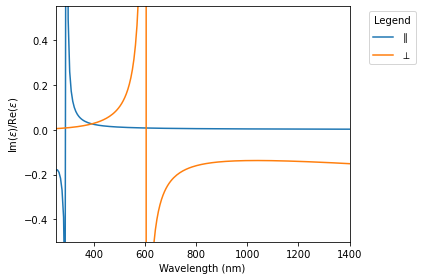

In [8]:
plt3, = plt.plot(x*lmda_ez.real*10**9, 20*eps_l_parallel.imag/eps_l_parallel.real, label = "$\parallel$")
plt4, = plt.plot(x*lmda_ez.real*10**9, 20*eps_l_perp.imag/eps_l_perp.real, label = "$\perp$")
plt.legend(handles=[plt3, plt4], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(250, 1400)
plt.ylim(-0.5, 0.55)
plt.ylabel("Im($\epsilon$)/Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(c) Dispersion of ordinary and extraordinary components of the effective permittivity tensor for a wired-hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

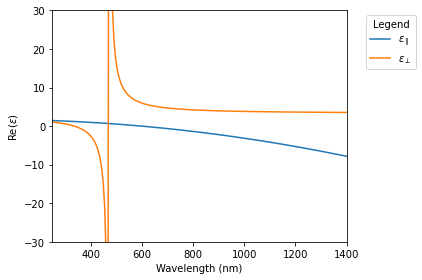

In [9]:
plt5, =plt.plot(x*lmda_ez.real*10**9, eps_parallel.real, label = "$\epsilon_\parallel$")
plt6, =plt.plot(x*lmda_ez.real*10**9, eps_perp.real, label = "$\epsilon_\perp$")
plt.xlim(250, 1400)
plt.ylim(-30, 30)
plt.legend(handles=[plt5, plt6], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(d) Dispersion of the material "quality factor" defined as the ratio of the imaginary to real part of the permittivity in wired hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

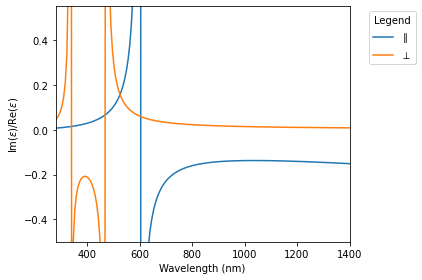

In [10]:
plt7, =plt.plot(x*lmda_ez.real*10**9, 20*eps_parallel.imag/eps_parallel.real, label = "$\parallel$")
plt8, =plt.plot(x*lmda_ez.real*10**9, 20*eps_perp.imag/eps_perp.real, label = "$\perp$")
plt.xlim(280, 1400)
plt.ylim(-0.5, 0.55)
plt.legend(handles=[plt7, plt8], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Im($\epsilon$)/Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

In order to estimate the influence of losses in the structure, we plot Im($\epsilon_\perp$)/Re($\epsilon_\perp$) and Im($\epsilon_\parallel$)/Re($\epsilon_\parallel$) for both layer-hyperbolic and wire-like hyperbolic structures. These functions correspond to the quality factor of the medium. We can also see that, away from the 600 nm point (near epsilon zero point), $\left| \, \frac{Im(\epsilon)}{Re(\epsilon)} \, \right| < 0.1$ implying that within the hyperbolic regime of interest, the wave attenuation due to losses is not so strong.

# Ag - GaP

$\rho = 0.3$; 100 nm period

In [11]:
w_p = 1.39*(10**16)
eps_d = 2
pac_frac = 0.3
w_p = (3/(5*1.39))*w_p
g_r = (10**-3)*w_p
g = g_r*1j
c = 3*10**8
k = pac_frac + (1 - pac_frac)*eps_d
w_ez = sqrt((w_p**2*pac_frac)/k - g_r**2).real
lmda_ez = 2*math.pi*c/w_ez
x = np.arange(0.1, 5, 0.01)
eps_m = 1 - (w_p**2/((w_ez/x)*((w_ez/x)-g)))
eps_perp = np.conj(((1 + pac_frac)*eps_m*eps_d + (1 - pac_frac)*eps_d**2)/((1 + pac_frac)*eps_d + (1 - pac_frac)*eps_m))
eps_parallel = np.conj(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_l_perp = np.conj(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_l_parallel = np.conj((eps_m*eps_d)/(pac_frac*eps_d + (1 - pac_frac)*eps_m))

In [12]:
print("Calculated value of lambda_ENZ is {}".format(lmda_ez*10**9) + " nm")

Calculated value of lambda_ENZ is 747.8507551550586 nm


Here also $\lambda_{ENZ}$ is much greater than the period justifies the use of effective medium theory

(a) Dispersion of ordinary and extraordinary components of the effective permittivity tensor for a layer-hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

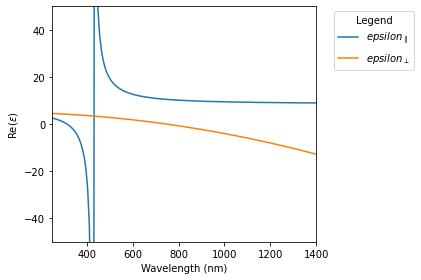

In [13]:
plt1, = plt.plot(x*lmda_ez.real*10**9, 3*eps_l_parallel.real, label = "$epsilon_{\parallel}$")
plt2, = plt.plot(x*lmda_ez.real*10**9, 3*eps_l_perp.real, label = "$epsilon_{\perp}$")
plt.legend(handles=[plt1, plt2], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(250, 1400)
plt.ylim(-50, 50)
plt.ylabel("Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(b) Dispersion of the material "quality factor" defined as the ratio of the imaginary to real part of the permittivity in layer hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

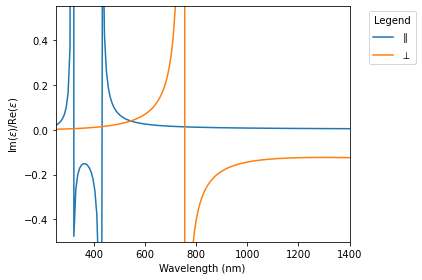

In [14]:
plt3, = plt.plot(x*lmda_ez.real*10**9, 20*eps_l_parallel.imag/eps_l_parallel.real, label = "$\parallel$")
plt4, = plt.plot(x*lmda_ez.real*10**9, 20*eps_l_perp.imag/eps_l_perp.real, label = "$\perp$")
plt.legend(handles=[plt3, plt4], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(250, 1400)
plt.ylim(-0.5, 0.55)
plt.ylabel("Im($\epsilon$)/Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(c) Dispersion of ordinary and extraordinary components of the effective permittivity tensor for a wired-hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

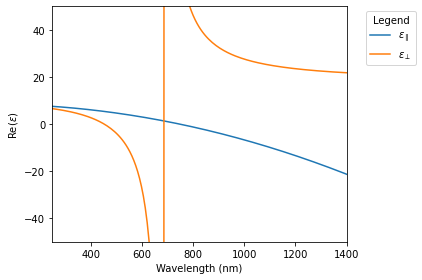

In [15]:
plt5, =plt.plot(x*lmda_ez.real*10**9, 5*eps_parallel.real, label = "$\epsilon_\parallel$")
plt6, =plt.plot(x*lmda_ez.real*10**9, 5*eps_perp.real, label = "$\epsilon_\perp$")
plt.xlim(250, 1400)
plt.ylim(-50, 50)
plt.legend(handles=[plt5, plt6], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

(d) Dispersion of the material "quality factor" defined as the ratio of the imaginary to real part of the permittivity in wired hyperbolic medium

Text(0.5, 0, 'Wavelength (nm)')

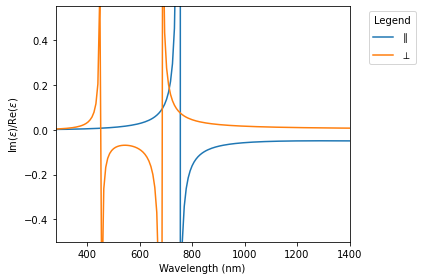

In [16]:
plt7, =plt.plot(x*lmda_ez.real*10**9, 8*eps_parallel.imag/eps_parallel.real, label = "$\parallel$")
plt8, =plt.plot(x*lmda_ez.real*10**9, 8*eps_perp.imag/eps_perp.real, label = "$\perp$")
plt.xlim(280, 1400)
plt.ylim(-0.5, 0.55)
plt.legend(handles=[plt7, plt8], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Im($\epsilon$)/Re($\epsilon$)")
plt.xlabel("Wavelength (nm)")

GaP is practically lossless above 450 nm, in the hyperbolic regime we obtain material dependent quality factors similar to those of Ag-LiNbO3 structures.

Next let us try to plot the functions related to the Spectral Power Density which was calculated above

In [17]:
#Functions that define all the required parameteres in the G function

def fresnel_vectors(kperp1, kperp2, wpump, eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, axis, fac, wez, wave_type, photon):
    #fresnel mode solutions
    global c
    if wave_type == "ordinary":
        kp = (wpump/c)*sqrt(abs(eps_perp_p.real))
    elif wave_type == "extraordinary":
        kp = (wpump/c)*sqrt(abs(eps_parallel_p.real))
        
    if photon == "signal":
        w_act = w
        eps_perp_act = eps_perp
        eps_parallel_act = eps_parallel
    elif photon == "idler":
        w_act = wpump - w
        eps_perp_act = eps_perp_i
        eps_parallel_act = eps_parallel_i
        
    k_parallel = sqrt(abs((eps_parallel_act*((w_act**2/c**2) - (kperp2**2/eps_perp_act) - (kperp1**2/eps_parallel_act))).real))
    k2 = kperp1**2 + kperp2**2 + k_parallel**2 
    if axis == "parallel":
        ux = u0*(kperp1/(k2 - ((w_act)**2/c**2)*eps_perp_act))
        uy = u0*(kperp2/(k2 - ((w_act)**2/c**2)*eps_perp_act))
        uz = u0*(k_parallel/(k2 - ((w_act)**2/c**2)*eps_parallel_act))
        
    elif axis == "perpendicular":
        ux = u0*(k_parallel/(k2 - ((w_act)**2/c**2)*eps_perp_act))
        uy = u0*(kperp1/(k2 - ((w_act)**2/c**2)*eps_perp_act))
        uz = u0*(kperp2/(k2 - ((w_act)**2/c**2)*eps_parallel_act))
    return (ux, uy, uz)

def der_w_eps_perp(pac_frac,wpump, wp, w, g, fac, wez, photon):
    # Derivative of eps_perp with respect to omega
    if photon == "signal":
        numerator = pac_frac*(wp**2)*(2*(w) - g*1j)
        denominator = (w)**2*((w) - g*1j)**2
    elif photon == "idler":
        numerator = pac_frac*(wp**2)*(2*((wpump - w)) - g*1j)
        denominator = (wpump - w)**2*((wpump - w) - g*1j)**2
        
    return (numerator/denominator).real

def der_w_eps_parallel(pac_frac,wpump, eps_d, wp, w, g, fac, wez, photon):
    #Derivative of eps_parallel with respect to omega
    if photon =="signal":
        numerator = (2*(w) - g*1j)*(pac_frac*eps_d*(eps_d*(w)*((w) - g*1j) - 1) + (1 - pac_frac)*(eps_d*((w)*((w) - g*1j) - wp**2) - 1))
        denominator_sqrt = pac_frac*eps_d*(w)*((w) - g*1j) + (1 - pac_frac)*((w)*((w) - g*1j) - wp**2)
        denominator = denominator_sqrt**2
        
    elif photon == "idler":
        numerator = (2*(wpump - w) - g*1j)*(pac_frac*eps_d*(eps_d*(wpump - w)*((wpump - w) - g*1j) - 1) + (1 - pac_frac)*(eps_d*((wpump - w)*((wpump - w) - g*1j) - wp**2) - 1))
        denominator_sqrt = pac_frac*eps_d*(wpump - w)*((wpump - w) - g*1j) + (1 - pac_frac)*((wpump - w)*((wpump - w) - g*1j) - wp**2)
        denominator = denominator_sqrt**2
    return (numerator/denominator).real

def norm_c(kx, ky, wpump, w,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, axis, fac, wez, photon, wave_type):
    #Normalization coefficients ck's
    if photon == "signal":
        w_act = w
        eps_parallel_act = eps_parallel
        eps_perp_act = eps_perp
    elif photon == "idler":
        w_act = wpump - w
        eps_parallel_act = eps_parallel_i
        eps_perp_act = eps_perp_i
        
    (ux, uy, uz) = fresnel_vectors(kx, ky,wpump, eps_perp_p, eps_parallel_p,eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, axis, fac, wez, wave_type, photon)
    term1 = eps_perp_act*ux*ux + eps_perp_act*uy*uy + eps_parallel_act*uz*uz
    eps_parallel_der = der_w_eps_parallel(pac_frac, wpump, eps_d, wp, w, g, fac, wez, photon)
    eps_perp_der = der_w_eps_perp(pac_frac,wpump, wp, w, g, fac, wez, photon)
    term2 = 0.5*(w_act)*(eps_perp_der*ux*ux + eps_perp_der*uy*uy + eps_parallel_der*uz*uz)
    overall_term = sqrt(term1 + term2)
    norm_const = 1/overall_term
    return norm_const.real

def const_fac(eps_perp_i, eps_parallel_i,eps_perp, eps_parallel, axis, photon):
    #Group velocities
    global c
    if photon == "signal":
        eps_parallel_act = eps_parallel
        eps_perp_act = eps_perp
    elif photon == "idler":
        eps_parallel_act = eps_parallel_i
        eps_perp_act = eps_perp_i
        
    if axis == "parallel":
        return (1/(2*c))*sqrt(abs(eps_perp_act.real))
    elif axis == "perpendicular":
        return (1/(2*c))*sqrt(abs(eps_parallel_act.real))
    
def decay_rate(w, wpump, ck, u, eps_perp, eps_parallel, fac, wez):
    #Decay rate of photons due to losses and reabsorption
    (ux, uy, uz) = u
    summation = (eps_perp.imag)*ux*ux + (eps_perp.imag)*uy*uy + (eps_parallel.imag)*uz*uz
    decr = (w)*ck*ck*summation
    return decr

def photon_dissipation(gamma, L):
    #Single photon dissipation rate
    phot_diss = np.exp(-1j*gamma*L)
    return phot_diss

def total_function(kperp1, kperp2,wpump,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, L, axis, fac, wez, wave_type):
    #Total integrand inside of G
    u_s = fresnel_vectors(kperp1, kperp2, wpump, eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, axis, fac, wez, wave_type, "signal")
    u_i = fresnel_vectors(kperp1, kperp2, wpump, eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, axis, fac, wez, wave_type, "idler")
    (ux_s, uy_s, uz_s) = u_s
    (ux_i, uy_i, uz_i) = u_i
    cks = norm_c(kperp1, kperp2, wpump, w,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, axis, fac, wez, "signal", wave_type)
    cki = norm_c(kperp1, kperp2, wpump, w,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, axis, fac, wez, "idler", wave_type)
    group_vel_s = const_fac(eps_perp_i, eps_parallel_i, eps_perp, eps_parallel, axis, "signal")
    group_vel_i = const_fac(eps_perp_i, eps_parallel_i, eps_perp, eps_parallel, axis, "idler")
    phase_matching = 1
    gamma = decay_rate(w,wpump, cks, u_s, eps_perp, eps_parallel, fac, wez)
    photon_diss = photon_dissipation(gamma, L)
    total_integrand = cks*cks*cki*cki*group_vel_s*group_vel_i*phase_matching*photon_diss
    return total_integrand.real

def integral_func(kperp1, kperp2, wpump,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, L, axis, fac, wez, wave_type):
    #Defining the integral
    (kperp1_l, kperp1_u) = kperp1
    (kperp2_l, kperp2_u) = kperp2
    integral_val = integrate.dblquad(total_function, kperp2_l, kperp2_u, kperp1_l, kperp1_u, args = (wpump,eps_perp_p, eps_parallel_p, eps_perp_i, eps_parallel_i, w, eps_perp, eps_parallel, u0, n, pac_frac, g, wp, eps_d, L, axis, fac, wez, wave_type))
    return integral_val[0]

def interchange_kperp_l(kperp2):
    #Function that computes the lower limit of the inner integral
    global i
    global eps_l_parallel
    global eps_l_perp
    global c
    global w_signal
    global np_ref_e
    limit_val_l = -1*sqrt(abs(((w_signal[i]/c)**2*(eps_l_parallel[i] - np_ref_e**2) - kperp2**2*(eps_l_parallel[i]/eps_l_perp[i])).real))
    return limit_val_l.real

def interchange_kperp_u(kperp2):
    #Function that computes the upper limit of the inner integral
    global i
    global eps_l_parallel
    global eps_l_perp
    global c
    global w_signal
    global np_ref_e
    limit_val_u = sqrt(abs(((w_signal[i]/c)**2*(eps_l_parallel[i] - np_ref_e**2) - kperp2**2*(eps_l_parallel[i]/eps_l_perp[i])).real))
    return limit_val_u.real

In [18]:
#Functions used to interpolate the jagged integral and get better results.
#This is done because double integral of such a complex integral is very computationally expensive.
#So number points of smapling is taken less in order to get results in lesser time and then interpolation and smoothening is used

def mean_filter(array, win_size):
    length = array.shape[0]
    win_half = int((win_size - 1)/2)
    pad_arr = np.zeros((length + 2*int(win_half),))
    out_length = pad_arr.shape[0]
    for i in range(0, length):
        mean = np.sum(array[i - win_half : i + win_half + 1])/win_size
        pad_arr[i + win_half] = mean
    output_arr = pad_arr[win_half : length + win_half]
    return output_arr

def Interpolate_fit(x, x_o, inp_arr,sym_range,sym_range_o, smval,pkh, lean, smoothen, filtering, interpolation, factor):
    max_index = np.argmax(inp_arr)
    output_arr = np.zeros(inp_arr.shape)
    for i in range(int(inp_arr.shape[0])):
        output_arr[i] = inp_arr[i]
    if lean.lower() == "right":
        for i in range(sym_range):
            output_arr[max_index - i] = output_arr[max_index + i]
    elif lean.lower() == "left":
        for i in range(sym_range):
            output_arr[max_index + i] = output_arr[max_index - i]
            
    if smoothen.lower() == "true":
        csa = scipy.interpolate.interp1d(x, output_arr, interpolation)
        cs_arr = csa(x_o)
        if filtering.lower() == "true":
            max_c_ind = np.argmax(cs_arr)
            lmax_l = max_c_ind - smval
            lmax_r = max_c_ind + smval
            temp_range = 17
            l_arr = cs_arr[lmax_l - temp_range : lmax_l + temp_range]
            r_arr = cs_arr[lmax_r - temp_range : lmax_r + temp_range]
            l_arr = ndimage.gaussian_filter(l_arr, 7)
            r_arr = ndimage.gaussian_filter(r_arr, 7)
            cs_arr[lmax_l - temp_range : lmax_l + temp_range] = l_arr
            cs_arr[lmax_r - temp_range : lmax_r + temp_range] = r_arr
        else:
            pass
        return cs_arr*factor
    elif smoothen.lower() == "false":
        return output_arr*factor

In [19]:
w_p = 1.4
eps_d = 0.02
pac_frac = 0.3
g_r = 10**-2
g = g_r*1j
c = 1
k = pac_frac + (1 - pac_frac)*eps_d
fac = 1.2
w_ez = np.sqrt(abs(((w_p**2*pac_frac)/k - g_r**2).real))
lmda_ez = 2*math.pi*c/w_ez
w_pump = fac*w_ez
lmda_pump = 2*math.pi*c/w_pump
x = np.array(np.arange(0.7, 5.3, 0.1))
lmda_signal = 2*lmda_pump*x
x2 = lmda_signal/lmda_ez
w_signal = 2*math.pi*c/lmda_signal
eps_m = 1 - (w_p**2/((w_signal)*((w_signal)-g)))
eps_mp = 1 - (w_p**2/((w_pump)*((w_pump)-g)))
eps_mi = 1 - (w_p**2/((w_pump - w_signal)*((w_pump - w_signal)-g)))
eps_perp = np.conjugate(((1 + pac_frac)*eps_m*eps_d + (1 - pac_frac)*eps_d**2)/((1 + pac_frac)*eps_d + (1 - pac_frac)*eps_m))
eps_parallel = np.conjugate(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_p_perp = np.conjugate(((1 + pac_frac)*eps_mp*eps_d + (1 - pac_frac)*eps_d**2)/((1 + pac_frac)*eps_d + (1 - pac_frac)*eps_mp))
eps_p_parallel = np.conjugate(pac_frac*eps_mp + (1 - pac_frac)*eps_d)
eps_i_perp = np.conjugate(((1 + pac_frac)*eps_mi*eps_d + (1 - pac_frac)*eps_d**2)/((1 + pac_frac)*eps_d + (1 - pac_frac)*eps_mi))
eps_i_parallel = np.conjugate(pac_frac*eps_mi + (1 - pac_frac)*eps_d)
eps_l_perp = np.conjugate(pac_frac*eps_m + (1 - pac_frac)*eps_d)
eps_lp_perp = np.conjugate(pac_frac*eps_mp + (1 - pac_frac)*eps_d)
eps_li_perp = np.conjugate(pac_frac*eps_mi + (1 - pac_frac)*eps_d)
eps_l_parallel = np.conjugate((eps_m*eps_d)/(pac_frac*eps_d + (1 - pac_frac)*eps_m))
eps_lp_parallel = np.conjugate((eps_mp*eps_d)/(pac_frac*eps_d + (1 - pac_frac)*eps_mp))
eps_li_parallel = np.conjugate((eps_mi*eps_d)/(pac_frac*eps_d + (1 - pac_frac)*eps_mi))
x1 = np.arange(1, 5, 0.05)/3.3
x2 = np.arange(1, 5, 0.01)/3.23
x3 = np.arange(1, 5, 0.01)/3.21
x4 = np.arange(1, 5, 0.01)/3.3
u0 = 1
np_ref_e = sqrt((eps_lp_parallel))
np_ref_o = sqrt((eps_lp_perp))
L = 3*lmda_ez

As referred to earlier, the number of samples is reduced to keep the computational expense less and quicker results. Then based on these sample values **interpolation is performed**. Just as a prefetch, let us see how does the interpolated output and it's corresponding input look 

In [20]:
num_samp = eps_l_perp.shape[0]
int_values_list = []
print("Beginning Sampling...")
print("Please wait till 46 samples are done for each plot")
for i in range(num_samp):
    print(f'Sample {i}\r', end="")
    kperp2_l = -1*sqrt(abs((((eps_l_perp[i]*w_signal[i]**2)/(eps_l_parallel[i]*c**2))*(eps_l_parallel[i] - eps_lp_parallel)).real)).real
    kperp2_u = sqrt(abs((((eps_l_perp[i]*w_signal[i]**2)/(eps_l_parallel[i]*c**2))*(eps_l_parallel[i] - eps_lp_parallel)).real)).real
    kperp2 = (kperp2_l, kperp2_u)
    kperp1 = (interchange_kperp_l, interchange_kperp_u)
    integral_val = integral_func(kperp1, kperp2, w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp[i], eps_li_parallel[i], w_signal[i], eps_l_perp[i], eps_l_parallel[i], u0, np_ref_e, pac_frac, g, w_p, eps_d, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list.append(integral_val)
print("Sampling done")

Beginning Sampling...
Please wait till 46 samples are done for each plot
Sampling done


Text(0.5, 1.0, 'Interpolation performed on generated samples')

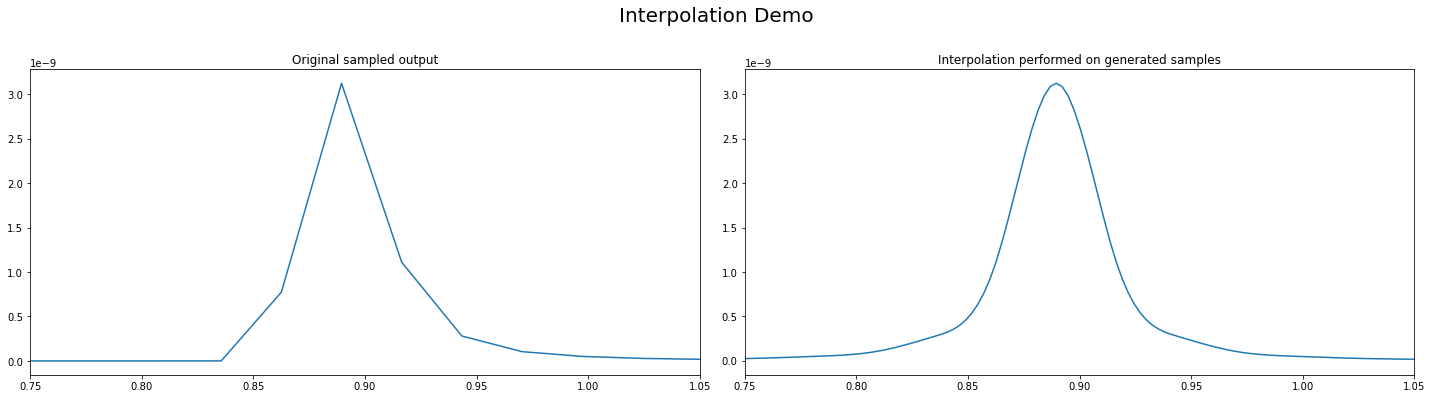

In [21]:
integ_array = np.array(int_values_list)
x_o = np.arange(1, 5, 0.01)
symm_test = Interpolate_fit(x, x_o, integ_array ,10, 2, 35,0.35, "right", "true","false", "cubic", 1)
plt.figure(figsize = (20, 5))
plt.suptitle("Interpolation Demo", fontsize = 20, y = 1.1)
plt.subplot(1, 2, 1)
plt.plot(x/3.71, integ_array)
plt.xlim(0.75, 1.05)
plt.title("Original sampled output")
plt.subplot(1, 2, 2)
plt.plot(x_o/3.71, symm_test)
plt.xlim(0.75, 1.05)
plt.title("Interpolation performed on generated samples")

In [22]:
#Put above sampling code into a function

def single_sampling(i,w_pt,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, g, w_p, eps_d, L, axis, fac, w_ez, wave_type):
    print(f'Sample {i}\r', end="")
    global w_pump
    kperp2_l = -1*math.sqrt(abs((((eps_l_perp[i]*w_signal[i]**2)/(eps_l_parallel[i]*c**2))*(eps_l_parallel[i] - eps_lp_parallel)).real))
    kperp2_u = math.sqrt(abs((((eps_l_perp[i]*w_signal[i]**2)/(eps_l_parallel[i]*c**2))*(eps_l_parallel[i] - eps_lp_parallel)).real))
    kperp2 = (kperp2_l, kperp2_u)
    kperp1 = (interchange_kperp_l, interchange_kperp_u)
    integral_val = integral_func(kperp1, kperp2, w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp[i], eps_li_parallel[i], w_signal[i], eps_l_perp[i], eps_l_parallel[i], u0, np_ref_e, pac_frac, g, w_p, eps_d, L, axis, fac, w_ez, wave_type)
    return integral_val

x1_w = x4*3000 - 2170
x2_w = x4*2000 - 1165
x3_w = x4*1300 - 440
x4_w = x4*1000 - 125

In [24]:
int_values_list_1 = []
int_values_list_2 = []
int_values_list_3 = []
int_values_list_4 = []

print("Beginning Computing Samples...")
time.sleep(1)
print("Please wait for the 4 plots to finish")
time.sleep(1)
print("Please wait till 46 samples are done for each plot\n")
time.sleep(1)
print("Beginning Sampling for Plot 1...")
for i in range(num_samp):
    integral_value = single_sampling(i,w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-6*1j, w_p, 0.014, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_1.append(integral_value)
print("Sampling Done for Plot 1\n")

x1_l = x4*2700 - 1770
x2_l = x4*2700 - 1700
x3_l = x4*2700 - 1600
x4_l = x4*2700 - 1500
x5_l = x4*2700 - 1470

print("Beginning Sampling for Plot 2...")
for i in range(num_samp):
    integral_value = single_sampling(i,w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-4*1j, w_p, 0.014, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_2.append(integral_value)
print("Sampling Done for Plot 2\n")

print("Beginning Sampling for Plot 3...")
for i in range(num_samp):
    integral_value = single_sampling(i,w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_3.append(integral_value)
print("Sampling Done for Plot 3\n")

print("Beginning Sampling for Plot 4...")
for i in range(num_samp):
    integral_value = single_sampling(i,w_pump,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-2*1j, w_p, 0.010, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_4.append(integral_value)
print("Sampling Done for Plot 4\n")

Beginning Computing Samples...
Please wait for the 4 plots to finish
Please wait till 46 samples are done for each plot

Beginning Sampling for Plot 1...
Sampling Done for Plot 1

Beginning Sampling for Plot 2...
Sampling Done for Plot 2

Beginning Sampling for Plot 3...
Sampling Done for Plot 3

Beginning Sampling for Plot 4...
Sampling Done for Plot 4



Text(0, 0.5, '$G(\\omega_s, \\omega_p) \\, (arb.u.)$')

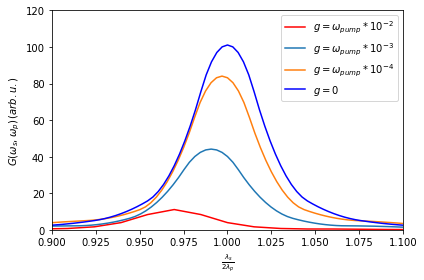

In [25]:
integ_array_1 = np.array(int_values_list_1)
integ_array_2 = np.array(int_values_list_2)
integ_array_3 = np.array(int_values_list_3)
integ_array_4 = np.array(int_values_list_4)
x_o = np.arange(1, 5, 0.01)
x_t = np.arange(1, 5, 0.05)
plot_1 = Interpolate_fit(x, x_t, integ_array_1 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 500)
plot_2 = Interpolate_fit(x, x_o, integ_array_2 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 2000)
plot_3 = Interpolate_fit(x, x_o, integ_array_3 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 4000)
plot_4 = Interpolate_fit(x, x_o, integ_array_4 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 3200)

plt.plot(x1, plot_1*10**7, "r", label = "$g = \omega_{pump}*10^{-2}$")
plt.plot(x2, plot_2*10**7, label = "$g = \omega_{pump}*10^{-3}$")
plt.plot(x3, plot_3*10**7, label = "$g = \omega_{pump}*10^{-4}$")
plt.plot(x4, plot_4*10**7, "b", label = "$g = 0$")
plt.xlim(0.9, 1.1)
plt.ylim(0, 120)
plt.legend()
plt.xlabel(r"$\frac{\lambda_s}{2\lambda_p}$")
plt.ylabel(r"$G(\omega_s, \omega_p) \, (arb.u.)$")

# Spectral Power Density Plots

In [26]:
int_values_list_w_1 = []
int_values_list_w_2 = []
int_values_list_w_3 = []
int_values_list_w_4 = []

lmda_1 = 350
lmda_2 = 370
lmda_3 = 390
lmda_4 = 410

w_1 = 2*np.pi*c/lmda_1
w_2 = 2*np.pi*c/lmda_2
w_3 = 2*np.pi*c/lmda_3
w_4 = 2*np.pi*c/lmda_4

print("Beginning Computing Samples...")
time.sleep(1)
print("Please wait for the 4 plots to finish")
time.sleep(1)
print("Please wait till 46 samples are done for each plot\n")
time.sleep(1)
print("Beginning Sampling for Plot 1...")
print("lambda_pump = {}".format(lmda_1) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_1,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_w_1.append(integral_value)
print("Sampling Done for Plot 1\n")

print("Beginning Sampling for Plot 2...")
print("lambda_pump = {}".format(lmda_2) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_2,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_w_2.append(integral_value)
print("Sampling Done for Plot 2\n")

print("Beginning Sampling for Plot 3...")
print("lambda_pump = {}".format(lmda_3) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_3,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_w_3.append(integral_value)
print("Sampling Done for Plot 3\n")

print("Beginning Sampling for Plot 4...")
print("lambda_pump = {}".format(lmda_4) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_4, eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_w_4.append(integral_value)
print("Sampling Done for Plot 4\n")

Beginning Computing Samples...
Please wait for the 4 plots to finish
Please wait till 46 samples are done for each plot

Beginning Sampling for Plot 1...
lambda_pump = 350 nm
Sampling Done for Plot 1

Beginning Sampling for Plot 2...
lambda_pump = 370 nm
Sampling Done for Plot 2

Beginning Sampling for Plot 3...
lambda_pump = 390 nm
Sampling Done for Plot 3

Beginning Sampling for Plot 4...
lambda_pump = 410 nm
Sampling Done for Plot 4



Calculated spectral power density of emitted signal photons for a wire-like hyperbolic $LiNbO_3-Ag$ metamaterial for different pump wave-lengths. The dashed curve shows expected emission from a bulk $LiNbO_3$ crystal of similar thickness at $\lambda_p = 350nm$

Text(0.5, 1.0, 'wire LiNbO3-Ag')

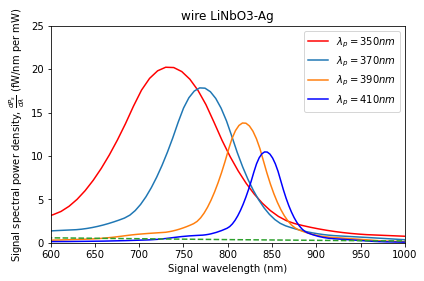

In [27]:
integ_array_w_1 = np.array(int_values_list_w_1)
integ_array_w_2 = np.array(int_values_list_w_2)
integ_array_w_3 = np.array(int_values_list_w_3)
integ_array_w_4 = np.array(int_values_list_w_4)

plot_1_w = Interpolate_fit(x, x_o, integ_array_w_1 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 8.5)
plot_2_w = Interpolate_fit(x, x_o, integ_array_w_2 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 7.5)
plot_3_w = Interpolate_fit(x, x_o, integ_array_w_3 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 5.8)
plot_4_w = Interpolate_fit(x, x_o, integ_array_w_4 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 4.4)

plt.plot(x1_w, plot_1_w*10**9/((x4)**4), "r", label = "$\lambda_p = 350nm$")
plt.plot(x2_w, plot_2_w*10**9/((x4)**4), label = "$\lambda_p = 370nm$")
plt.plot(x3_w, plot_3_w*10**9/((x4)**4), label = "$\lambda_p = 390nm$")
plt.plot(x4_w, plot_4_w*10**9/((x4)**4), "b", label = "$\lambda_p = 410nm$")
plt.plot(x4*800, np.exp(-1*(x4**2)), linestyle = "dashed")
plt.xlim(600, 1000)
plt.ylim(0, 25)
plt.legend()
plt.xlabel("Signal wavelength (nm)")
plt.ylabel(r"Signal spectral power density, $\frac{dP_s}{d\lambda}$ (fW/nm per mW)")
plt.title("wire LiNbO3-Ag")

**As we can see, the actual spectral power density of the emitted photons in this band of pump wavelengths is much higher compared to the expected emission which shows a broadband mode of operation i.e., the number of available optical modes in a hyperbolic regime tend to be infinite or semi infinite. This was exactly the task that was set out with.**

In [28]:
int_values_list_l_1 = []
int_values_list_l_2 = []
int_values_list_l_3 = []
int_values_list_l_4 = []
int_values_list_l_5 = []

lmda_1 = 400
lmda_2 = 450
lmda_3 = 500
lmda_4 = 550
lmda_5 = 570

w_1 = 2*np.pi*c/lmda_1
w_2 = 2*np.pi*c/lmda_2
w_3 = 2*np.pi*c/lmda_3
w_4 = 2*np.pi*c/lmda_4
w_5 = 2*np.pi*c/lmda_5

print("Beginning Computing Samples...")
time.sleep(1)
print("Please wait for the 5 plots to finish")
time.sleep(1)
print("Please wait till 46 samples are done for each plot\n")
time.sleep(1)
print("Beginning Sampling for Plot 1...")
print("lambda_pump = {}".format(lmda_1) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_1,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_l_1.append(integral_value)
print("Sampling Done for Plot 1\n")

print("Beginning Sampling for Plot 2...")
print("lambda_pump = {}".format(lmda_2) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_2,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_l_2.append(integral_value)
print("Sampling Done for Plot 2\n")

print("Beginning Sampling for Plot 3...")
print("lambda_pump = {}".format(lmda_3) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_3,eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_l_3.append(integral_value)
print("Sampling Done for Plot 3\n")

print("Beginning Sampling for Plot 4...")
print("lambda_pump = {}".format(lmda_4) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_4, eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_l_4.append(integral_value)
print("Sampling Done for Plot 4\n")

print("Beginning Sampling for Plot 5...")
print("lambda_pump = {}".format(lmda_5) + " nm")
for i in range(num_samp):
    integral_value = single_sampling(i,w_5, eps_lp_perp, eps_lp_parallel, eps_li_perp, eps_li_parallel, w_signal, eps_l_perp, eps_l_parallel, u0, np_ref_e, pac_frac, w_pump*10**-3*1j, w_p, 0.012, L, "perpendicular", fac, w_ez, "extraordinary")
    int_values_list_l_5.append(integral_value)
print("Sampling Done for Plot 5\n")

Beginning Computing Samples...
Please wait for the 5 plots to finish
Please wait till 46 samples are done for each plot

Beginning Sampling for Plot 1...
lambda_pump = 400 nm
Sampling Done for Plot 1

Beginning Sampling for Plot 2...
lambda_pump = 450 nm
Sampling Done for Plot 2

Beginning Sampling for Plot 3...
lambda_pump = 500 nm
Sampling Done for Plot 3

Beginning Sampling for Plot 4...
lambda_pump = 550 nm
Sampling Done for Plot 4

Beginning Sampling for Plot 5...
lambda_pump = 570 nm
Sampling Done for Plot 5



Spectral power density of emitted signal photons for a layer hyperbolic metametrial. The dashed curve shows the expected emission from a bulk LiNbO3 at $\lambda_p = 500nm$, for comparison

Text(0.5, 1.0, 'layer LiNbO3-Ag')

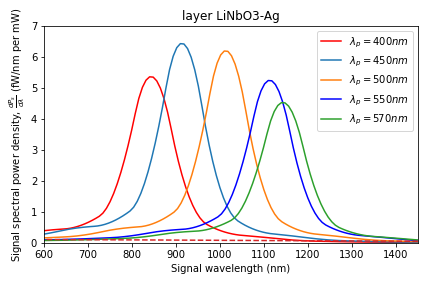

In [29]:
integ_array_l_1 = np.array(int_values_list_l_1)
integ_array_l_2 = np.array(int_values_list_l_2)
integ_array_l_3 = np.array(int_values_list_l_3)
integ_array_l_4 = np.array(int_values_list_l_4)
integ_array_l_5 = np.array(int_values_list_l_5)

plot_1_l = Interpolate_fit(x, x_o, integ_array_l_1 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 2.25)
plot_2_l = Interpolate_fit(x, x_o, integ_array_l_2 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 2.7)
plot_3_l = Interpolate_fit(x, x_o, integ_array_l_3 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 2.6)
plot_4_l = Interpolate_fit(x, x_o, integ_array_l_4 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 2.2)
plot_5_l = Interpolate_fit(x, x_o, integ_array_l_5 ,10, 2, 35,0.35, "right", "true","false", "quadratic", 1.9)

plt.plot(x1_l, plot_1_l*10**9/((x4)**4), "r", label = "$\lambda_p = 400nm$")
plt.plot(x2_l, plot_2_l*10**9/((x4)**4), label = "$\lambda_p = 450nm$")
plt.plot(x3_l, plot_3_l*10**9/((x4)**4), label = "$\lambda_p = 500nm$")
plt.plot(x4_l, plot_4_l*10**9/((x4)**4), "b", label = "$\lambda_p = 550nm$")
plt.plot(x5_l, plot_5_l*10**9/((x4)**4), label = "$\lambda_p = 570nm$")
plt.plot(x4*1500, np.exp(-1*(x4**2))/8, linestyle = "dashed")

plt.xlim(600, 1450)
plt.ylim(0, 7)
plt.legend()
plt.xlabel("Signal wavelength (nm)")
plt.ylabel(r"Signal spectral power density, $\frac{dP_s}{d\lambda}$ (fW/nm per mW)")
plt.title("layer LiNbO3-Ag")

**Just like in the wired case, here also we see a broadband mode of operation**

# Question

In the part where we quantized the Electric fields of the Signal and Idler photons, the Electric field **E** was a solution of the Maxwell equations. However, we are dealing with an anisotropic medium here. Is it okay to consider directly the simple solution of the Maxwell equations? Are there any flaws in the Quantization approach being used here? 

**Hints** : Is **E** a canonical variable? ; What about the Coulomb gauge, can it still be used here? What modifications to the Quantization procedure are suggested and what do all quantizations start with